In [1]:
import pandas as pd
import numpy as np

In [2]:
df=pd.read_csv('/Users/ManluHe/Downloads/data/metadata.csv')
df=df[['source_x','title','abstract', 'publish_time']]

C:\Users\ManluHe\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (5,13,14,16) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


## Source

In [45]:
df1=df[['source_x']]
df1=df1.apply(lambda x: x.str.split(';').explode())
df1['source_x'] = df1['source_x'].str.lstrip()
df1=df1.groupby(by=[df1.source_x]).size().reset_index()
df1.rename(columns={0:'count'}, inplace=True)

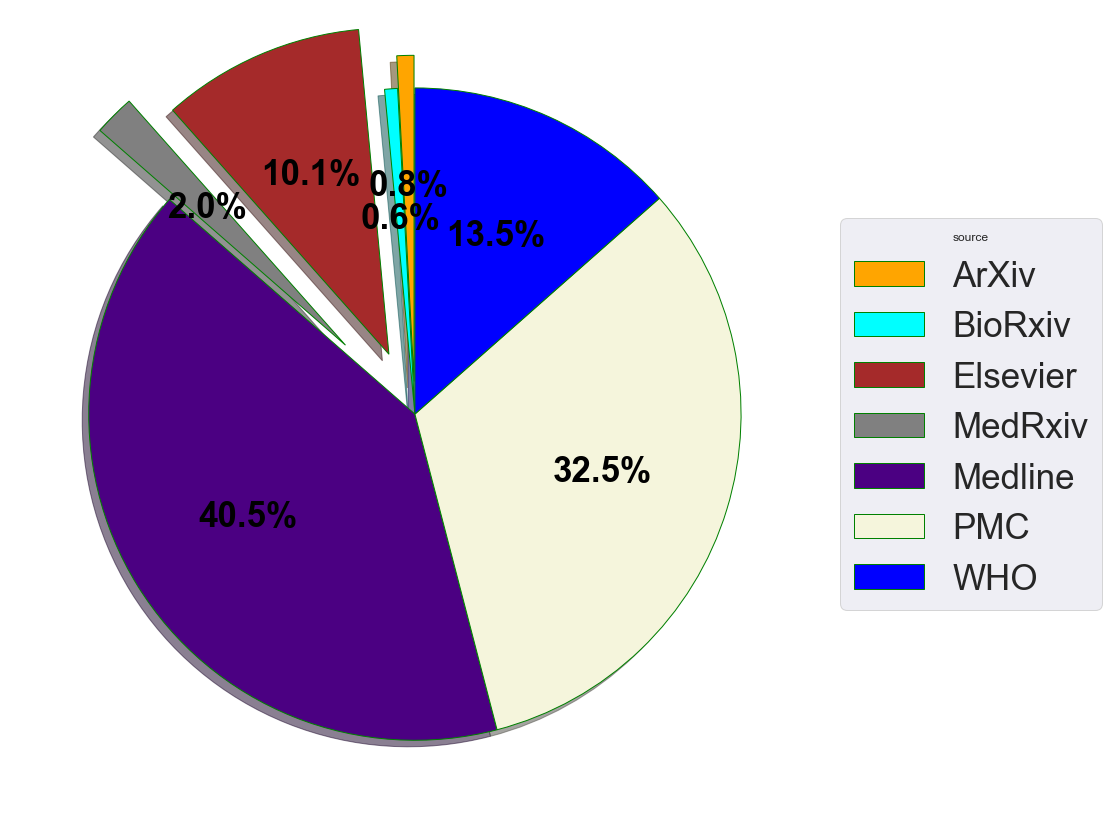

In [281]:
import matplotlib.pyplot as plt 
 
values=df1['count'].tolist()
sources=df1['source_x'].tolist()
  
# Creating explode data 
explode = (0.1, 0.0, 0.2, 0.3, 0.0, 0.0, 0.0) 
  
 
colors = ( "orange", "cyan", "brown", 
          "grey", "indigo", "beige",'blue') 
  
wp = { 'linewidth' : 1, 'edgecolor' : "green" } 
  
def func(pct, allvalues): 
    absolute = int(pct / 100.*np.sum(allvalues)) 
    return "{:.1f}%".format(pct) 
  
fig, ax = plt.subplots(figsize =(15, 15)) 
wedges, texts, autotexts = ax.pie(values,  
                                  autopct = lambda pct: func(pct, values), 
                                  explode = explode,  
                                  shadow = True, 
                                  colors = colors, 
                                  startangle = 90, 
                                  wedgeprops = wp, 
                                  textprops = dict(color ="black")) 
  
ax.legend(wedges, sources, 
          title ="source", 
          loc ="center left", 
          bbox_to_anchor =(1, 0, 0.5, 1),fontsize=35) 
  
plt.setp(autotexts, size = 35, weight ="bold") 
# ax.set_title("Sources") 
  
plt.show() 

## Publish time

In [170]:
import datetime as dt

df2=df[['publish_time']]
df2['year'] = pd.to_datetime(df2['publish_time'],format='%Y/%m/%d').dt.year
df2['year'] = df2.year.astype('Int64')
df2=df2.dropna()

C:\Users\ManluHe\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\Users\ManluHe\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [182]:
year = ['<1950','1950-1960','1960-1970',\
         '1970-1980','1980-1990','1990-2000','2000-2010','2010-2020'] 
num = [0,0,0,0,0,0,0,0]

def label(yr):
    if yr>=0 and yr<=1950: num[0]=num[0]+1
    if yr>1950 and yr<=1960: num[1]=num[1]+1
    if yr>1960 and yr<=1970: num[2]=num[2]+1
    if yr>1970 and yr<=1980: num[3]=num[3]+1   
    if yr>1980 and yr<=1990: num[4]=num[4]+1
    if yr>1990 and yr<=2000: num[5]=num[5]+1
    if yr>2000 and yr<=2010: num[6]=num[6]+1
    if yr>2010 and yr<=2020: num[7]=num[7]+1    

for yr in df2.year:
    label(yr)

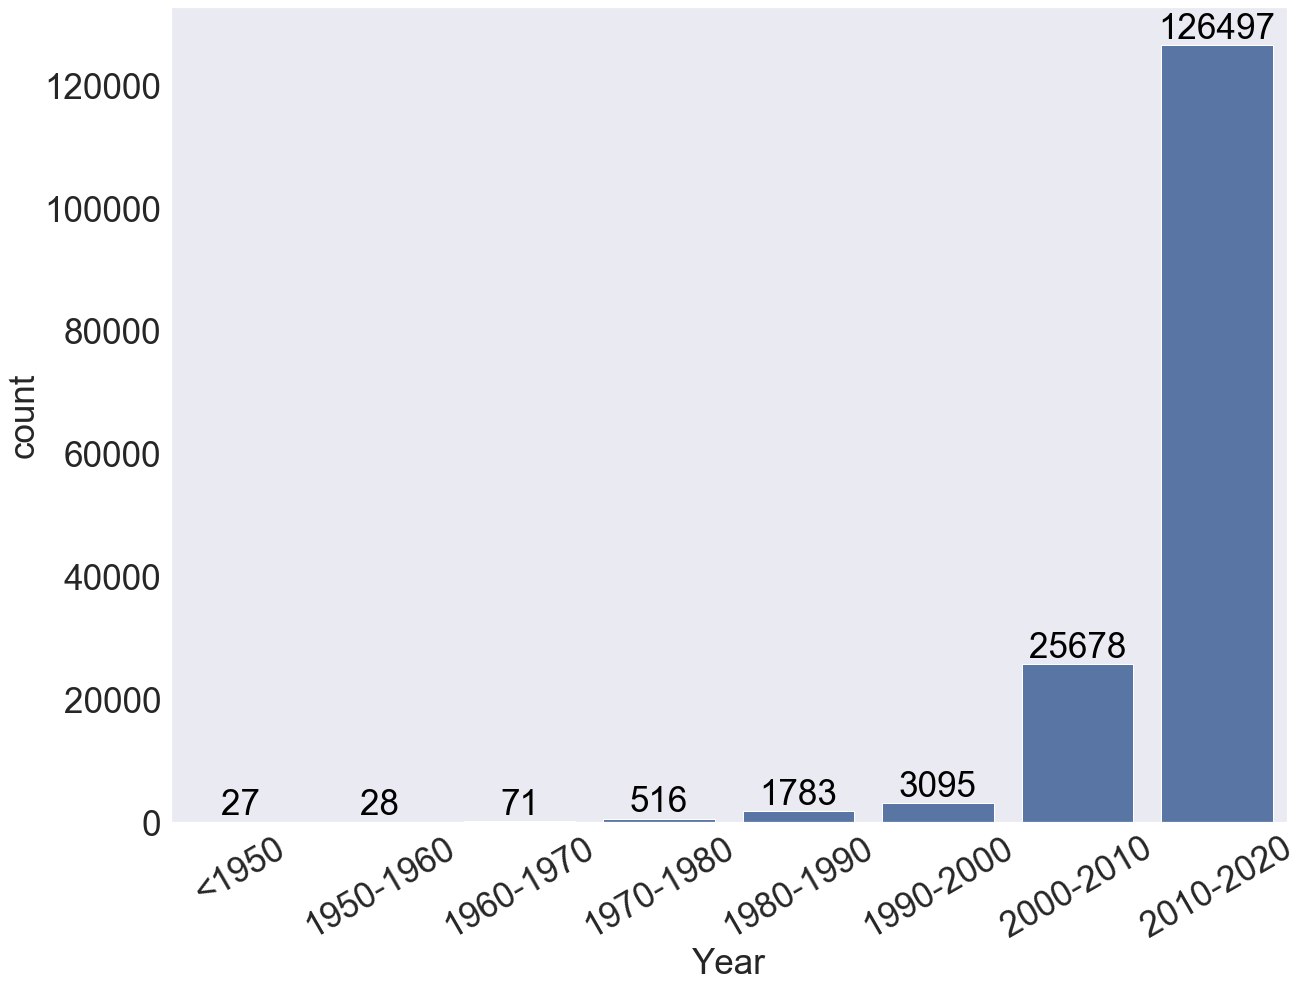

In [286]:
import seaborn as sns
plt.figure(figsize=(20,15))

data = pd.DataFrame(list(zip(year, num)), 
               columns =['year', 'count']) 

sns.set(style="dark")
g = sns.barplot(x='year',y='count', data=data, color='b')
plt.setp(g.get_xticklabels(), rotation=30,size=35)
plt.setp(g.get_yticklabels(), size=35)
g.set_xlabel("Year",fontsize=35)
g.set_ylabel("count",fontsize=35)


for p in g.patches:
    g.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.4, p.get_height()),
                    ha='center', va='bottom',
                    color= 'black',size=35)

## Abstract Keywords

In [194]:
df3=df[['abstract']]
word_list=[i for i in df3.abstract]
wl=[]
for i in word_list:
    for x in str(i).split():
        wl.append(x)
w=[i.lower() for i in wl]

In [246]:
from collections import Counter
abs_word_list = w
abs_word_count = Counter(abs_word_list).most_common()
new_abs_word_count = [i for i in abs_word_count if i[0] not in ['of', 'and', 'in', 'the','a','acute',\
                                                                'we','were','their','were','or','our',\
                                                                'this','be','between','that','study',\
                                                                'also','two','there','had','most','after',\
                                                                'for', 'with', 'to', 'from', 'by', 'on',\
                                                                'an', 'at', 'as', 'is', 'are', '1', ' ',\
                                                                '2', 'during', 'against', 'de', 'using',\
                                                               'used','or','no','nan','it','not','may',\
                                                               'have','was', 'all','which','can','been',\
                                                               'these','can','but','than','||','more',\
                                                               'such','one','its','use','new','both',\
                                                                'other','has','=','different','high',\
                                                               'however,','time','compared','cells',\
                                                               'including','into','among','will','who',\
                                                               'number','studies','significantly','first',\
                                                               'patients','showed','viruses','viral','found',\
                                                               'higher','only']]

labels, values = zip(*new_abs_word_count)
wd=list(labels)
c=list(values)
data2 = dict(zip(wd,c))

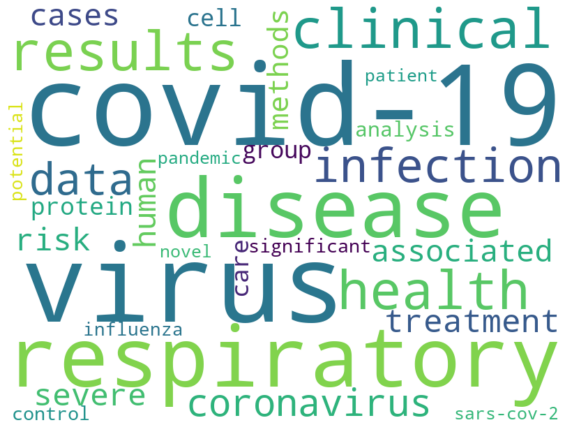

In [247]:
from wordcloud import WordCloud

wc_pic2 = WordCloud(background_color='white',width=800, height=600, max_words=30).generate_from_frequencies(data2)
plt.figure(figsize=(10, 10))
plt.imshow(wc_pic2, interpolation='bilinear')
plt.axis('off')
plt.show()